#Price prediction problem using neural networks.
The aim is to predict the price of AirBnb rooms using all the features available in the dataset. This leads to a problem with two inputs data (numeric and image) that we are going to try to solve using Deep Learning techniques.
The following image summarizes the architecture to be developed.

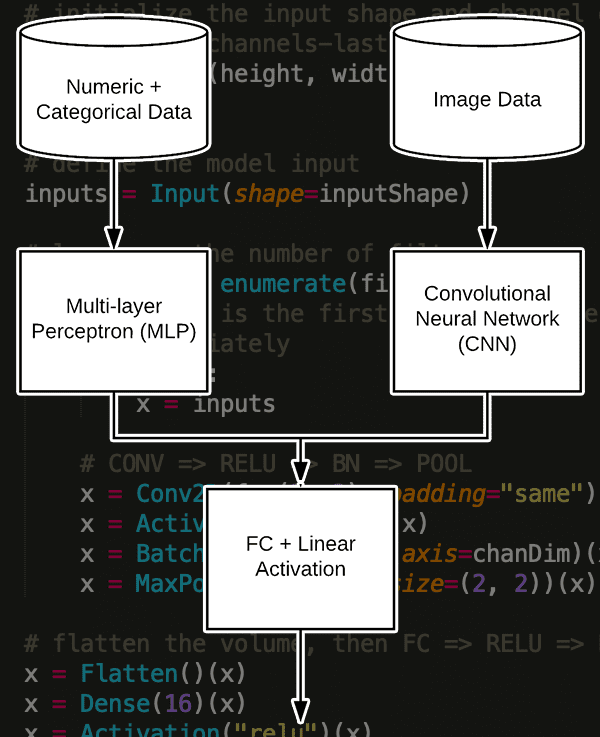

# 1. Loading the Airbnb dataset

In [1]:
# Let's download the dataset
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2022-01-30 17:47:44--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [           <=>      ]  54.31M  2.83MB/s    in 18s     

2022-01-30 17:48:04 (2.96 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [2]:
# Checking what we downloaded
!ls -ll

total 1966152
-rw-r--r-- 1 root root   56950929 Jan 30 17:48 airbnb-listings.csv
drwx------ 5 root root       4096 Jan 30 17:26 drive
-rw-r--r-- 1 root root 1956262016 Jan 30 17:34 images.npy
drwxr-xr-x 1 root root       4096 Jan  7 14:33 sample_data
-rw-r--r-- 1 root root     104096 Jan 30 17:35 was_loaded.npy


In [3]:
# Let's see an overview of the dataset
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5).T

,0,1,2,3,4
ID,3150371,3378181,2070750,9832499,1868170
Listing Url,https://www.airbnb.com/rooms/3150371,https://www.airbnb.com/rooms/3378181,https://www.airbnb.com/rooms/2070750,https://www.airbnb.com/rooms/9832499,https://www.airbnb.com/rooms/1868170
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Double room + bathroom - La Latina,"Ópera/Plz Mayor -- A/C, elevator",Centric room with a balcony,PLAZA DE ESPAÑA - Único - Gimnasio.,"Loft/duplex 150m2, 3 double rooms"
...,...,...,...,...,...
Cancellation Policy,flexible,strict,flexible,strict,moderate
Calculated host listings count,1,2,4,9,1
Reviews per Month,2.33,2.69,0.6,3.56,1.13
Geolocation,"40.41010608050749,-3.714754034177323","40.416968822636726,-3.7094389211089993","40.40970517560235,-3.7135611928841086","40.42319271738103,-3.7112486513892","40.416513932601625,-3.7178427529546973"


In [4]:
#And let's see all the columns
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

At this point, we are going to split the dataset in two. We will use one as a numerical and categorical data source and the other as an image source.

## 1.1. Numeric and categoric data
A previous and necessary step, when doing the exploratory analysis and its subsequent preprocessing, is to divide our data set into Train and Test. However, I am going to select some columns beforehand. The main reason is that I am avoiding columns that are of a descriptive type and would require an NLP analysis.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [6]:
principalColumns = ['Experiences Offered', 'Neighbourhood', 'City','Room Type','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square Feet','Guests Included','Extra People','Review Scores Rating','Latitude', 'Longitude', 'Number of Reviews', 'Bed Type', 'Thumbnail Url']
#The new dataset
numeric = data[principalColumns]
numeric.head().T

,0,1,2,3,4
Experiences Offered,none,none,none,none,none
Neighbourhood,Palacio,Palacio,La Latina,Malasaña,Palacio
City,Madrid,Madrid,Madrid,Madrid,Madrid
Room Type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
Accommodates,2,2,2,4,8
Bathrooms,1,1,1,1,3
Bedrooms,1,1,1,1,3
Beds,1,1,1,2,4
Price,36,85,20,112,190
Square Feet,NaN,NaN,861,NaN,NaN


In [7]:
numeric.shape

(14001, 18)

In [8]:
numeric.dtypes

Experiences Offered      object
Neighbourhood            object
City                     object
Room Type                object
Accommodates              int64
Bathrooms               float64
Bedrooms                float64
Beds                    float64
Price                   float64
Square Feet             float64
Guests Included           int64
Extra People              int64
Review Scores Rating    float64
Latitude                float64
Longitude               float64
Number of Reviews         int64
Bed Type                 object
Thumbnail Url            object
dtype: object

It is observed that we have chosen 5 columns whose type is object. We will work with these 5 columns for two reasons:
* The City column will allow us to see that almost all of our records are from Madrid and that we should focus our algorithm on Madrid.
* The rest of the columns could be interesting as object of categorization and pass it on to our model. However, that should be done once we divide by train / test.

In [9]:
#Justification for choosing only Madrid
numeric['City'].value_counts()

Madrid                13207
Barcelona               292
马德里                      52
Palma                    49
Alcúdia                  40
                      ...  
Ariany                    1
Boadilla del Monte        1
Vallgornera               1
Rotes Velles              1
La Elipa                  1
Name: City, Length: 135, dtype: int64

Madrid is the city with more records: 13207. The next city is Barcelona, with 292 records.

In [10]:
isMadrid = numeric.loc[:, 'City'] == 'Madrid'
numeric = numeric.loc[isMadrid]

numeric['City'].value_counts()

Madrid    13207
Name: City, dtype: int64

In [11]:
#Now, we can drop City column
numeric.drop(['City'], axis=1, inplace=True)
numeric.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Experiences Offered,Neighbourhood,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Number of Reviews,Bed Type,Thumbnail Url
0,none,Palacio,Private room,2,1.0,1.0,1.0,36.0,NaN,1,0,98.0,40.410106,-3.714754,80,Real Bed,https://a0.muscache.com/im/pictures/40713802/3...
1,none,Palacio,Entire home/apt,2,1.0,1.0,1.0,85.0,NaN,1,0,95.0,40.416969,-3.709439,90,Real Bed,https://a0.muscache.com/im/pictures/44239584/c...
2,none,La Latina,Private room,2,1.0,1.0,1.0,20.0,861.0,1,10,91.0,40.409705,-3.713561,20,Real Bed,https://a0.muscache.com/im/pictures/84378550/f...
3,none,Malasaña,Entire home/apt,4,1.0,1.0,2.0,112.0,NaN,2,5,99.0,40.423193,-3.711249,55,Real Bed,https://a0.muscache.com/im/pictures/be441d1f-4...
4,none,Palacio,Entire home/apt,8,3.0,3.0,4.0,190.0,NaN,6,40,96.0,40.416514,-3.717843,46,Real Bed,https://a0.muscache.com/im/pictures/c232f016-f...


### 1.1.1 Exploratory analysis
In the exploratory analysis I will perform the steps:

1. Categorize variables. For example, "Room type".
2. Studying of NA values.
3. Analyzing possible outliers.
5. Correlations.

> **Categorize variables**



In [12]:
numeric["Experiences Offered"].value_counts()

none    13207
Name: Experiences Offered, dtype: int64

*Experiences Offered* was interesting because it showed whether the apartment offered experiences for the family, for bussines ... However, when choosing the apartments in Madrid, only "none" values remained in this variable. We have to eliminate this column since it does not contribute anything. 

In [13]:
numeric = numeric.drop('Experiences Offered', axis=1)

In [14]:
numeric.Neighbourhood.value_counts()

Malasaña               894
La Latina              809
Embajadores            795
Sol                    716
Justicia               556
                      ... 
Estrella                12
Retiro                  11
Atocha                   6
Fuencarral-El Pardo      4
Tetuán                   4
Name: Neighbourhood, Length: 65, dtype: int64

In [15]:
numeric.Neighbourhood.isna().sum()

4454

There are many records without Neighbourhood. I believe that to fill in these gaps I will use *none* instead of *mode*. Thus, noise will not be added to the neighborhood that appears the most: "Malasaña"

In [16]:
numeric["Neighbourhood"].fillna('None', inplace=True)

In [17]:
numeric.Neighbourhood.value_counts()

None                   4454
Malasaña                894
La Latina               809
Embajadores             795
Sol                     716
                       ... 
Estrella                 12
Retiro                   11
Atocha                    6
Tetuán                    4
Fuencarral-El Pardo       4
Name: Neighbourhood, Length: 66, dtype: int64

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [19]:
le1 = LabelEncoder()
numeric['Neighbourhood'] = le1.fit_transform(numeric['Neighbourhood'])
numeric['Neighbourhood']

0        49
1        49
2        40
3        43
4        49
         ..
13960    56
13961    46
13962    46
13963    46
13964     9
Name: Neighbourhood, Length: 13207, dtype: int64

In [20]:
le2 = LabelEncoder()
numeric['Room Type'] = le2.fit_transform(numeric['Room Type'])
numeric['Room Type']

0        1
1        0
2        1
3        0
4        0
        ..
13960    0
13961    1
13962    1
13963    1
13964    1
Name: Room Type, Length: 13207, dtype: int64

In [21]:
le3 = LabelEncoder()
numeric['Bed Type'] = le3.fit_transform(numeric['Bed Type'])
numeric['Bed Type']

0        4
1        4
2        4
3        4
4        4
        ..
13960    4
13961    4
13962    4
13963    4
13964    4
Name: Bed Type, Length: 13207, dtype: int64

> **Studying of NA values.**



In [22]:
for column in numeric.columns:
    print(f"Case: {column}. Number of records: {numeric.shape[0]}. Number of NA's: {numeric[column].isna().sum()}")

Case: Neighbourhood. Number of records: 13207. Number of NA's: 0
Case: Room Type. Number of records: 13207. Number of NA's: 0
Case: Accommodates. Number of records: 13207. Number of NA's: 0
Case: Bathrooms. Number of records: 13207. Number of NA's: 49
Case: Bedrooms. Number of records: 13207. Number of NA's: 23
Case: Beds. Number of records: 13207. Number of NA's: 49
Case: Price. Number of records: 13207. Number of NA's: 9
Case: Square Feet. Number of records: 13207. Number of NA's: 12688
Case: Guests Included. Number of records: 13207. Number of NA's: 0
Case: Extra People. Number of records: 13207. Number of NA's: 0
Case: Review Scores Rating. Number of records: 13207. Number of NA's: 2838
Case: Latitude. Number of records: 13207. Number of NA's: 0
Case: Longitude. Number of records: 13207. Number of NA's: 0
Case: Number of Reviews. Number of records: 13207. Number of NA's: 0
Case: Bed Type. Number of records: 13207. Number of NA's: 0
Case: Thumbnail Url. Number of records: 13207. Num

This study shows that the *Square Feet* variable has too many Na's values. It must be removed. Also, in the third section (Preprocessing), I will handle the variables with some NAs: *Bathrooms, Bedrooms, Beds, Review Scores Rating*.



> **Analyzing possible outliers**



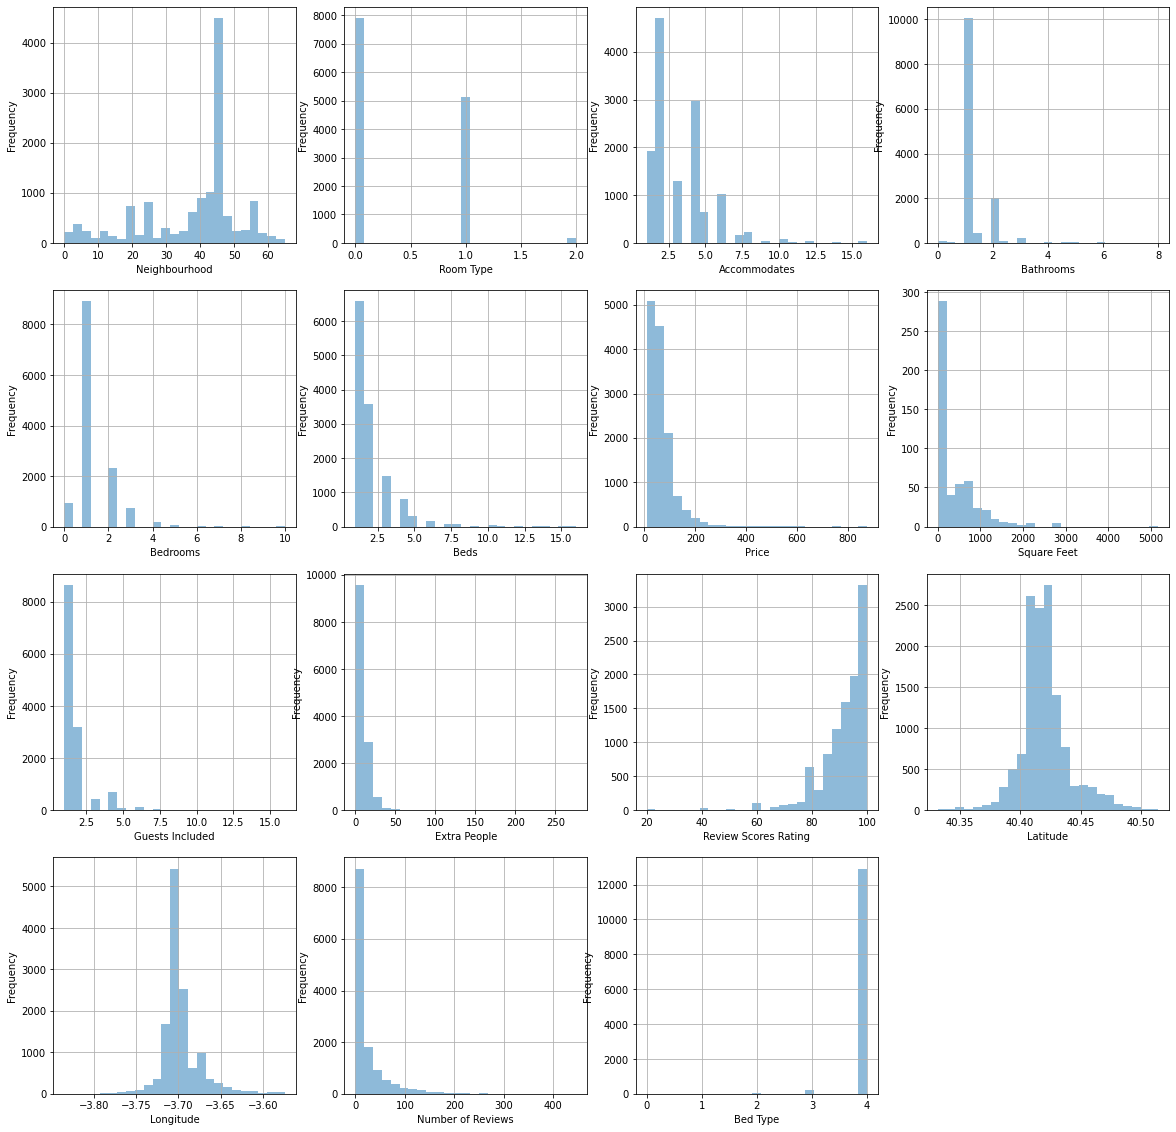

In [23]:
plt.figure(figsize=(20, 20))

a=1
for i in numeric.columns:
    if i != 'Thumbnail Url':
      plt.subplot(4,4,a)
      numeric[i].plot.hist(alpha=0.5, bins=25, grid = True)
      #plt.axis([0, 10, 0, 10000])
      plt.xlabel(i)
      a = a + 1

plt.show()

From these histograms we can see that:
* Some variables have very high values with few records. They could be hotels and hostels that have a high number of bathrooms, bedrooms and beds. In my model I will omit these records and focus on private homes.



> **Correlations**

Finally, the correlation matrix will be represented to check if there is any strong dependency between the working variables that are currently selected.



In [24]:
numeric.corr()

,Neighbourhood,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Number of Reviews,Bed Type
Neighbourhood,1.000000,-0.013908,0.012957,0.034515,0.000273,-0.012321,0.042580,0.010864,0.013826,-0.001061,0.020033,-0.083510,0.084277,-0.000054,0.008875
Room Type,-0.013908,1.000000,-0.489458,0.025053,-0.244639,-0.265794,-0.455682,-0.055447,-0.361285,-0.107616,0.005668,-0.012544,0.070019,-0.138437,0.004974
Accommodates,0.012957,-0.489458,1.000000,0.332216,0.678169,0.824224,0.580916,0.395467,0.582593,0.273281,-0.061077,-0.002198,-0.052802,0.082352,0.034449
Bathrooms,0.034515,0.025053,0.332216,1.000000,0.423099,0.384998,0.349508,0.427989,0.188703,0.090312,0.010079,0.042839,0.009218,-0.059989,0.041005
Bedrooms,0.000273,-0.244639,0.678169,0.423099,1.000000,0.684907,0.525673,0.418939,0.435260,0.147740,0.010368,0.029142,0.012175,-0.028489,0.066181
Beds,-0.012321,-0.265794,0.824224,0.384998,0.684907,1.000000,0.486250,0.390307,0.459194,0.211927,-0.052980,0.015374,-0.023230,0.035248,0.055158
Price,0.042580,-0.455682,0.580916,0.349508,0.525673,0.486250,1.000000,0.309067,0.371806,0.110451,0.055743,0.065554,-0.025854,-0.033936,0.034098
Square Feet,0.010864,-0.055447,0.395467,0.427989,0.418939,0.390307,0.309067,1.000000,0.175385,0.149144,0.000945,0.097291,0.019392,-0.100657,0.042531
Guests Included,0.013826,-0.361285,0.582593,0.188703,0.435260,0.459194,0.371806,0.175385,1.000000,0.347285,0.008864,-0.013124,-0.035723,0.120118,0.027081
Extra People,-0.001061,-0.107616,0.273281,0.090312,0.147740,0.211927,0.110451,0.149144,0.347285,1.000000,0.018172,0.009357,-0.014381,0.071705,-0.011963


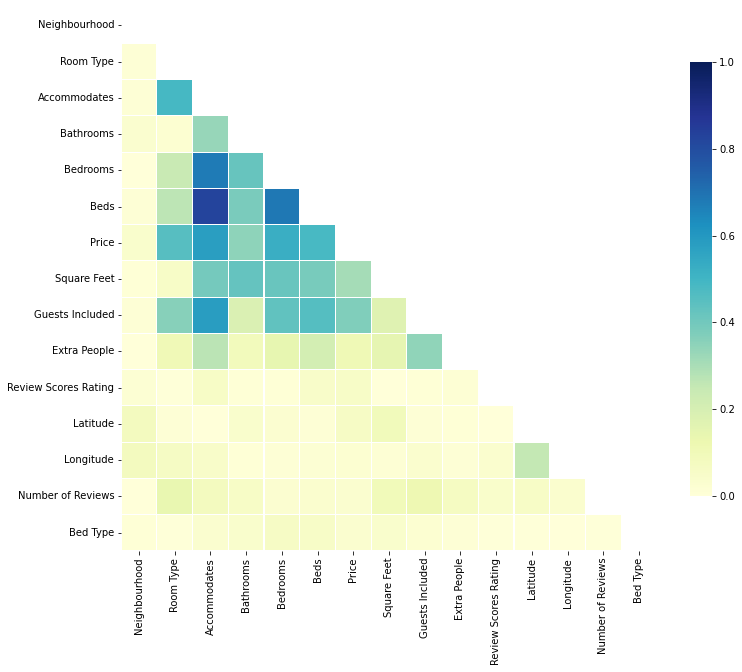

In [25]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(numeric.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

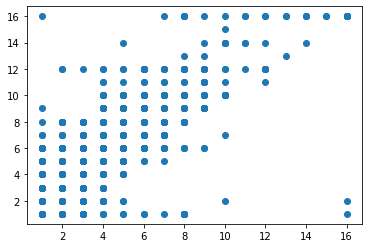

In [26]:
plt.scatter(numeric['Beds'], numeric['Accommodates'])
plt.show()

The correlation matrix shows that there is a strong relationship between *Accommodates* and *Beds*. By representing one against the other, it seems that there is a relationship of the type x = y. One of the two will be removed in our dataset.

### 1.1.2 Preprocessing
In this section, we will perform the necessary transformations seen in the previous section:
1. Delete Accommodates column.
2. Fill Na's.
3. Eliminate outliers.



> **Delete Accommodates and Square Feet columns.**



In [27]:
numeric = numeric.drop(['Accommodates','Square Feet'], axis=1)
numeric.head(10)

,Neighbourhood,Room Type,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Number of Reviews,Bed Type,Thumbnail Url
0,49,1,1.0,1.0,1.0,36.0,1,0,98.0,40.410106,-3.714754,80,4,https://a0.muscache.com/im/pictures/40713802/3...
1,49,0,1.0,1.0,1.0,85.0,1,0,95.0,40.416969,-3.709439,90,4,https://a0.muscache.com/im/pictures/44239584/c...
2,40,1,1.0,1.0,1.0,20.0,1,10,91.0,40.409705,-3.713561,20,4,https://a0.muscache.com/im/pictures/84378550/f...
3,43,0,1.0,1.0,2.0,112.0,2,5,99.0,40.423193,-3.711249,55,4,https://a0.muscache.com/im/pictures/be441d1f-4...
4,49,0,3.0,3.0,4.0,190.0,6,40,96.0,40.416514,-3.717843,46,4,https://a0.muscache.com/im/pictures/c232f016-f...
5,49,1,2.0,1.0,1.0,30.0,1,5,67.0,40.416834,-3.710240,3,4,https://a0.muscache.com/im/pictures/90548067/4...
6,25,1,1.0,1.0,1.0,18.0,1,0,NaN,40.413945,-3.705637,0,4,https://a0.muscache.com/im/pictures/48573525/a...
7,46,1,1.0,1.0,1.0,38.0,1,10,93.0,40.409248,-3.704052,78,4,https://a0.muscache.com/im/pictures/37148597/4...
8,40,0,1.0,1.0,1.0,71.0,1,0,90.0,40.412001,-3.706691,8,4,https://a0.muscache.com/im/pictures/5ecdbcc7-9...
9,46,0,1.0,0.0,1.0,48.0,1,0,90.0,40.409949,-3.695517,49,3,https://a0.muscache.com/im/pictures/106816640/...




> **Fill Na's**



In [28]:
#Bathrooms, Bedrooms, Beds, Review Scores Rating are all discrete variables, they will be filled with the mode.
numeric["Bathrooms"].fillna(numeric["Bathrooms"].mode()[0], inplace=True)
numeric["Bedrooms"].fillna(numeric["Bedrooms"].mode()[0], inplace=True)
numeric["Beds"].fillna(numeric["Beds"].mode()[0], inplace=True)
numeric["Review Scores Rating"].fillna(numeric["Review Scores Rating"].mode()[0], inplace=True)



> **Eliminate outliers**



In [29]:
#Bathrooms, Bedrooms, Beds
numeric = numeric[numeric['Bathrooms'] < 6]
numeric = numeric[numeric['Bedrooms'] < 7]
numeric = numeric[numeric['Beds'] < 10]
numeric = numeric[numeric['Bathrooms']>0]



> **Eliminate Nan and low values in Price**



In [30]:
numeric = numeric[numeric['Price'] > 10]

## 1.2. Image data

In [33]:
# Let's create a list with image url and index
images_paths = []
for i, img_url in enumerate(numeric['Thumbnail Url']):
  images_paths.append([i, img_url])

In [34]:
# Let's see what we build
print(images_paths[:10])
print(len(images_paths))

[[0, 'https://a0.muscache.com/im/pictures/40713802/33eb3411_original.jpg?aki_policy=small'], [1, 'https://a0.muscache.com/im/pictures/44239584/c11cd625_original.jpg?aki_policy=small'], [2, 'https://a0.muscache.com/im/pictures/84378550/fa2dbe0d_original.jpg?aki_policy=small'], [3, 'https://a0.muscache.com/im/pictures/be441d1f-4d11-4fbf-86a4-d62c78356d32.jpg?aki_policy=small'], [4, 'https://a0.muscache.com/im/pictures/c232f016-f2cf-45e4-8a1c-2aadaaa44a73.jpg?aki_policy=small'], [5, 'https://a0.muscache.com/im/pictures/90548067/4746f77f_original.jpg?aki_policy=small'], [6, 'https://a0.muscache.com/im/pictures/48573525/acb63e6a_original.jpg?aki_policy=small'], [7, 'https://a0.muscache.com/im/pictures/37148597/483c364b_original.jpg?aki_policy=small'], [8, 'https://a0.muscache.com/im/pictures/5ecdbcc7-9a02-40e2-9801-54c2fbf5dbf4.jpg?aki_policy=small'], [9, 'https://a0.muscache.com/im/pictures/106816640/965e2d19_original.jpg?aki_policy=small']]
12996


In [35]:
import imageio as io
import cv2
from numpy import moveaxis
import PIL.Image

# This function downloads the images and returns them with the index where to save them

def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)

        # If channels info is in first place, move to last position
        if (img.shape[0] < img.shape[1] ) and (img.shape[0] < img.shape[2]):
          img = moveaxis(img, 0, 2)

        # In case any image is RGBA, take onloy RGB channels
        img = img[...,:3]

        # Some images may be in black & white. I convert to to RGB as otherwise it generates error
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
        
    except IOError as err:
        return (None, idx)

In [36]:
print(len(images_paths))

12996


In [37]:
# Tensor to save the images
loaded_images = np.zeros((len(images_paths), 224, 224, 3), dtype=np.uint8)

# Tensor to check which images were not saved
was_loaded = np.zeros(len(images_paths))

In [38]:
print(loaded_images.shape)

(12996, 224, 224, 3)


In [39]:
# import concurrent
# from tqdm import tqdm

# # Creating pool to load images. By default, it uses as much cores as your machine has

# with concurrent.futures.ProcessPoolExecutor() as executor:


#     for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):

#         # Loading the images

#         if img is not None:
#             loaded_images[idx] = img
#             was_loaded[idx] = 1
#         else:
#             was_loaded[idx] = 0

# print('Finished!')
# print(f'Number of images loaded: {sum(was_loaded)}/{len(images_paths)}')

In [40]:
# np.save('images.npy', loaded_images)
# np.save('was_loaded.npy', was_loaded)

In [41]:
#Saving the images in Drive
# !cp images.npy /content/drive/My\ Drive/images.npy
# !cp was_loaded.npy /content/drive/My\ Drive/was_loaded.npy

In [42]:
# !ls -lah images.npy was_loaded.npy

In [43]:
images_loaded =  np.load("/content/drive/MyDrive/images.npy")

In [44]:
was_loaded = np.load("/content/drive/MyDrive/was_loaded.npy")

In [45]:
images_loaded.shape

(12996, 224, 224, 3)

In [73]:
was_loaded

array([1., 1., 1., ..., 0., 1., 1.])

In [47]:
numeric.shape[0]

12996

In [63]:
np.unique(was_loaded, return_counts=True)

(array([0., 1.]), array([ 2478, 10518]))

In [65]:
img= np.zeros([10518,64,64,3], dtype=int)
outputImage = np.zeros((64, 64, 3), dtype="uint8")

In [66]:
numeric.shape

(12996, 14)

In [72]:
j=0
for i in range(numeric.shape[0]):
  if was_loaded[i] == 1:
    outputImage = cv2.resize(images_loaded[i], dsize=(64, 64))
    img[j]= outputImage
  j+=j
img.shape

(10518, 64, 64, 3)

In [74]:
numeric['was_loaded'] = was_loaded.tolist()

In [78]:
numeric = numeric[numeric['was_loaded'] == 1]
numeric.shape

(10518, 15)

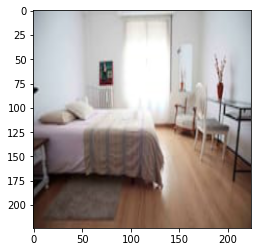

In [79]:
plt.imshow(images_loaded[0])

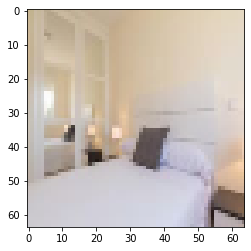

In [80]:
plt.imshow(img[0])

In [ ]:
#Scaling
img = img/255
img.shape

At this point, df be divided into Xnum and Ynum.

In [82]:
Xnum = numeric.drop('Price', axis=1)
Ynum = numeric['Price'].values

> **Fitting X_test and y_test**


It would be interesting to apply scaling to nuemric data.

In [87]:
Xnum = Xnum.drop('Thumbnail Url', axis=1)
Xnum.shape

(10518, 13)

In [88]:
#Scaler
scaler = preprocessing.StandardScaler().fit(Xnum)
Xnum = scaler.transform(Xnum)

# 2. Creating the neural model
We have already processed the two data sources. It's time to create a neural model with the two inputs.

To choose a starting point for our network we will rely on the work of others. It is my first network and I have no experience. In these cases, it is best to consult the biography of those who have experience and start from their models. I will use a neural network similar to this: [keras-multiple-inputs-and-mixed-data](https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/)

In the following steps I will create two models. One for numerical data and one for images. We will then concatenate the results of each and apply a convergence layer to obtain the regression.

In [89]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))
	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
	# return our model
	return model

In [90]:
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# define the model input
	inputs = Input(shape=inputShape)
	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs
		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)
  # flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)
	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = Dense(4)(x)
	x = Activation("relu")(x)
	# check to see if the regression node should be added
	if regress:
		x = Dense(1, activation="linear")(x)
	# construct the CNN
	model = Model(inputs, x)
	# return the CNN
	return model

Let's build the train/test data

In [102]:
from sklearn.model_selection import train_test_split
split = train_test_split(Xnum, img, Ynum, test_size=0.2, random_state=0)
(trainAttrX, testAttrX, trainImagesX, testImagesX, trainYnum, testYnum) = split


Time to build the final Keras model capable of handling both multiple inputs and mixed data.

In [99]:
# import the necessary packages

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
import numpy as np

# create the MLP and CNN models
mlp = create_mlp(trainAttrX.shape[1], regress=False)
cnn = create_cnn(64, 64, 3, regress=False)
# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([mlp.output, cnn.output])
# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)
# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[mlp.input, cnn.input], outputs=x)


In [104]:
#Compile, train, and evaluate our newly formed model
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model.fit(
	x=[trainAttrX, trainImagesX], y=trainYnum,
	validation_data=([testAttrX, testImagesX], testYnum),
	epochs=15, batch_size=8)
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict([testAttrX, testImagesX])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training model...
Epoch 1/15
1052/1052 [==============================] - 76s 70ms/step - loss: 59.0368 - val_loss: 34.7602
Epoch 2/15
1052/1052 [==============================] - 69s 66ms/step - loss: 32.2342 - val_loss: 30.5740
Epoch 3/15
1052/1052 [==============================] - 67s 64ms/step - loss: 30.0620 - val_loss: 30.1539
Epoch 4/15
1052/1052 [==============================] - 68s 64ms/step - loss: 29.4027 - val_loss: 30.2488
Epoch 5/15
1052/1052 [==============================] - 79s 75ms/step - loss: 29.0916 - val_loss: 29.5613
Epoch 6/15
1052/1052 [==============================] - 78s 74ms/step - loss: 28.8538 - val_loss: 29.3419
Epoch 7/15
1052/1052 [==============================] - 85s 81ms/step - loss: 28.6950 - val_loss: 29.3405
Epoch 8/15
1052/1052 [==============================] - 85s 81ms/step - loss: 28.5314 - val_loss: 29.2372
Epoch 9/15
1052/1052 [==============================] - 83s 79ms/step - loss: 28.3973 - val_loss: 28.9904
Epoch 10/15
1052/1052

In [106]:
# compute the difference between the *predicted* house prices and the *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testYnum
percentDiff = (diff / testYnum) * 100
absPercentDiff = np.abs(percentDiff)

# compute the mean and standard deviation of the absolute percentage difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
import locale
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(numeric["Price"].mean(), grouping=True),
	locale.currency(numeric["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] avg. house price: $61.36, std house price: $50.08
[INFO] mean: 28.33%, std: 26.77%


# 3. Experiments and conclusions

In this last section we are going to try to carry out some experiments to see how the model adapts to some changes. In addition, we will try to draw some conclusions thanks to these experiments.

## 3.1. Comparison
The main working objective of this Notebook was to work with multiple inputs. It is interesting to compare the results obtained with models that only work with one data source.

In [109]:
#Model MLP for numeric data
mlp1 = create_mlp(trainAttrX.shape[1], regress=True)
#regress is a parameter which allows us to make a regression as result

#Compile, train, and evaluate our newly formed model
opt = Adam(lr=1e-3, decay=1e-3 / 200)
mlp1.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
mlp1.fit(
	x=trainAttrX, y=trainYnum,
	validation_data=(testAttrX, testYnum),
	epochs=100, batch_size=8)



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training model...
Epoch 1/100
1052/1052 [==============================] - 5s 3ms/step - loss: 73.9379 - val_loss: 49.4051
Epoch 2/100
1052/1052 [==============================] - 3s 3ms/step - loss: 37.1979 - val_loss: 31.0880
Epoch 3/100
1052/1052 [==============================] - 3s 3ms/step - loss: 29.9832 - val_loss: 29.4277
Epoch 4/100
1052/1052 [==============================] - 2s 2ms/step - loss: 28.9414 - val_loss: 28.9596
Epoch 5/100
1052/1052 [==============================] - 2s 2ms/step - loss: 28.4995 - val_loss: 28.6782
Epoch 6/100
1052/1052 [==============================] - 2s 2ms/step - loss: 28.2726 - val_loss: 28.5874
Epoch 7/100
1052/1052 [==============================] - 2s 2ms/step - loss: 28.1372 - val_loss: 28.5136
Epoch 8/100
1052/1052 [==============================] - 2s 2ms/step - loss: 28.0347 - val_loss: 28.4498
Epoch 9/100
1052/1052 [==============================] - 2s 2ms/step - loss: 27.9432 - val_loss: 28.4788
Epoch 10/100
1052/1052 [======

In [110]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = mlp1.predict(testAttrX)

diff = preds.flatten() - testYnum
percentDiff = (diff / testYnum) * 100
absPercentDiff = np.abs(percentDiff)

# compute the mean and standard deviation of the absolute percentage difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
import locale
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(numeric["Price"].mean(), grouping=True),
	locale.currency(numeric["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: $61.36, std house price: $50.08
[INFO] mean: 26.83%, std: 27.39%


Here we can see that we have obtained similar results. This makes us think that the network that works on the set of images does not provide relevant results.

In [116]:
#Model CNN for images data

CNN1 = create_cnn(64, 64, 3, regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
CNN1.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
CNN1.fit(x=trainImagesX, y=trainYnum, 
    validation_data=(testImagesX, testYnum),
    epochs=15, batch_size=8)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training model...
Epoch 1/15
1052/1052 [==============================] - 57s 52ms/step - loss: 72.5609 - val_loss: 56.5544
Epoch 2/15
1052/1052 [==============================] - 52s 50ms/step - loss: 55.0433 - val_loss: 49.6630
Epoch 3/15
1052/1052 [==============================] - 52s 50ms/step - loss: 52.1642 - val_loss: 47.1363
Epoch 4/15
1052/1052 [==============================] - 52s 50ms/step - loss: 50.7321 - val_loss: 46.3567
Epoch 5/15
1052/1052 [==============================] - 52s 49ms/step - loss: 49.4094 - val_loss: 46.7498
Epoch 6/15
1052/1052 [==============================] - 54s 51ms/step - loss: 48.9521 - val_loss: 46.4056
Epoch 7/15
1052/1052 [==============================] - 54s 51ms/step - loss: 48.8194 - val_loss: 46.5957
Epoch 8/15
1052/1052 [==============================] - 53s 51ms/step - loss: 48.7850 - val_loss: 46.4959
Epoch 9/15
1052/1052 [==============================] - 53s 51ms/step - loss: 47.9462 - val_loss: 46.3518
Epoch 10/15
1052/1052

In [120]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = CNN1.predict(testImagesX)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - testYnum
percentDiff = (diff / testYnum) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(numeric["Price"].mean(), grouping=True),
	locale.currency(numeric["Price"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: $61.36, std house price: $50.08
[INFO] mean: 46.64%, std: 27.81%


The conclusion that we can draw from these results is that, to predict the price, the images we have are not enough. Perhaps it would be necessary to have a more complete and structured image dataset. For example, we can see that for some records we have images of very different areas of the house.

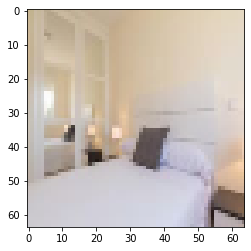

In [123]:
plt.imshow(img[0])

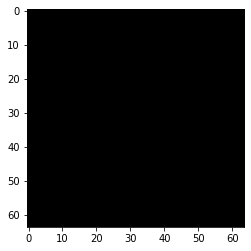

In [124]:
plt.imshow(img[150])

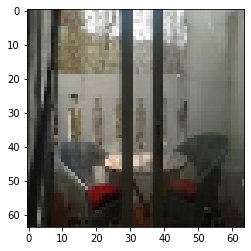

In [126]:
plt.imshow(img[900])

## 3.2 Vary our model
When making model.fit we have had to use a small number of epochs. This is because our combined model is somewhat complex and would take a long time for a larger number of epochs. It would be interesting to simplify the CNN part, which is the one that takes the most time, and see what results it produces.

In turn, we could try to complicate the MLP since it is the one that has the most weight when it comes to obtaining good results.

In [137]:
def create2_mlp(dim, regress=False):
  # define our MLP network
  model = Sequential()
  model.add(Dense(8, input_dim=dim, activation="relu"))
  model.add(Dense(4, activation="relu"))
  model.add(Dense(8, activation="relu"))
  
  # check to see if the regression node should be added
  if regress:
    model.add(Dense(1, activation="linear"))
	# return our model
  return model

In [141]:
def create2_cnn(width, height, depth, filters=(16, 32), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
  inputShape = (height, width, depth)
  chanDim = -1
	# define the model input
  inputs = Input(shape=inputShape)
	# loop over the number of filters
  for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
    if i == 0:
      x = inputs
		# CONV => RELU => BN => POOL
    x = Conv2D(f, (3, 3), padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
  # flatten the volume, then FC => RELU => BN => DROPOUT
  x = Flatten()(x)
  x = Dense(16)(x)
  x = Activation("relu")(x)
  x = BatchNormalization(axis=chanDim)(x)
  x = Dropout(0.5)(x)
	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
  x = Dense(5)(x)
  x = Activation("relu")(x)
	# check to see if the regression node should be added
  if regress:
    x = Dense(1, activation="linear")(x)
	# construct the CNN
  model = Model(inputs, x)
	# return the CNN
  return model

In [142]:
# create the MLP and CNN models
mlp2 = create2_mlp(trainAttrX.shape[1], regress=False)
cnn2 = create2_cnn(64, 64, 3, regress=False)
# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([mlp2.output, cnn2.output])
# our final FC layer head will have two dense layers, the final one
# being our regression head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)
# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model2 = Model(inputs=[mlp2.input, cnn2.input], outputs=x)

In [144]:
#Compile, train, and evaluate our newly formed model
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model2.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
model2.fit(
	x=[trainAttrX, trainImagesX], y=trainYnum,
	validation_data=([testAttrX, testImagesX], testYnum),
	epochs=30, batch_size=8)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[INFO] training model...
Epoch 1/30
1052/1052 [==============================] - 56s 51ms/step - loss: 48.3636 - val_loss: 30.9561
Epoch 2/30
1052/1052 [==============================] - 44s 42ms/step - loss: 30.1066 - val_loss: 29.2334
Epoch 3/30
1052/1052 [==============================] - 44s 42ms/step - loss: 28.9435 - val_loss: 28.7664
Epoch 4/30
1052/1052 [==============================] - 45s 43ms/step - loss: 28.3588 - val_loss: 28.4376
Epoch 5/30
1052/1052 [==============================] - 44s 42ms/step - loss: 28.1884 - val_loss: 28.3857
Epoch 6/30
1052/1052 [==============================] - 45s 43ms/step - loss: 28.0459 - val_loss: 28.1677
Epoch 7/30
1052/1052 [==============================] - 44s 41ms/step - loss: 27.8730 - val_loss: 28.0491
Epoch 8/30
1052/1052 [==============================] - 44s 42ms/step - loss: 27.7340 - val_loss: 28.0974
Epoch 9/30
1052/1052 [==============================] - 44s 42ms/step - loss: 27.6781 - val_loss: 27.9710
Epoch 10/30
1052/1052

Each epoch has been executed in approximately half the time (~44s instead of ~84s) and a lower Loss has been obtained. Furthermore, it can be seen that the number of epochs could still be increased since Loss continued to decrease. However, this is out of my time.